In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from MIOFlow.datasets import make_dying_example_unif

In [4]:
# #| export
# import numpy as np
# import pandas as pd

# def make_uniform_rect(x_bounds, y_bounds, num_points):
#     """
#     Generates uniformly distributed points within a rectangular box.

#     Parameters:
#     - x_bounds: Tuple (x_min, x_max) defining the bounds on the X-axis.
#     - y_bounds: Tuple (y_min, y_max) defining the bounds on the Y-axis.
#     - num_points: The number of points to generate.

#     Returns:
#     - points: A 2D numpy array where each row is a point [x, y].
#     """
#     x_min, x_max = x_bounds
#     y_min, y_max = y_bounds
    
#     x_points = np.random.uniform(x_min, x_max, num_points)
#     y_points = np.random.uniform(y_min, y_max, num_points)

#     points = np.column_stack((x_points, y_points))
    
#     return points

# import numpy as np
# import pandas as pd

# def make_gaussian_rect(x_bounds, y_bounds, num_points):
#     """
#     Generates Gaussian distributed points within a rectangular box.
    
#     Parameters:
#     - x_bounds: Tuple (x_min, x_max) defining the bounds on the X-axis.
#     - y_bounds: Tuple (y_min, y_max) defining the bounds on the Y-axis.
#     - num_points: The number of points to generate.
    
#     Returns:
#     - points: A 2D numpy array where each row is a point [x, y].
#     """
#     x_min, x_max = x_bounds
#     y_min, y_max = y_bounds
    
#     # Calculate the mean and standard deviation based on the bounds
#     x_mean = (x_min + x_max) / 2
#     y_mean = (y_min + y_max) / 2
#     x_std = (x_max - x_min) / 3  # 99.7% of data within bounds for ±3 std
#     y_std = (y_max - y_min) / 6
    
#     # Generate Gaussian distributed points within the rectangle
#     x_points = np.random.normal(x_mean, x_std, num_points)
#     y_points = np.random.normal(y_mean, y_std, num_points)
    
#     # Clip the points to stay within the specified bounds
#     x_points = np.clip(x_points, x_min, x_max)
#     y_points = np.clip(y_points, y_min, y_max)
    
#     # Combine the points into a 2D array (each row is a point [x, y])
#     points = np.column_stack((x_points, y_points))
    
#     return points

# def make_dying_example_unif(n_pts_per_bin=50, seed=223):
#     np.random.seed(seed)
#     tp0 = make_uniform_rect((-1.5, -1.1), (-0.5, 0.5), n_pts_per_bin*2)
#     tp1 = make_uniform_rect((-0.5, 0.0), (-0.5, 0.5), n_pts_per_bin*2)
#     tp2 = make_uniform_rect((0.5, 1.0), (-0.5, 0.5), n_pts_per_bin*2)
#     tp3 = make_uniform_rect((1.5, 2.0), (0., 0.5), n_pts_per_bin)
#     tp4 = make_uniform_rect((2.5, 3.0), (0., 0.5), n_pts_per_bin)
#     # concatenate, but add a column for the timepoint, make it a dataframe
#     # Create dataframes and add a timepoint column

#     df_tp0 = pd.DataFrame(tp0, columns=['d1', 'd2'])
#     df_tp0['samples'] = 0

#     df_tp1 = pd.DataFrame(tp1, columns=['d1', 'd2'])
#     df_tp1['samples'] = 1

#     df_tp2 = pd.DataFrame(tp2, columns=['d1', 'd2'])
#     df_tp2['samples'] = 2

#     df_tp3 = pd.DataFrame(tp3, columns=['d1', 'd2'])
#     df_tp3['samples'] = 3

#     df_tp4 = pd.DataFrame(tp4, columns=['d1', 'd2'])
#     df_tp4['samples'] = 4

#     # Concatenate the dataframes
#     df = pd.concat([df_tp0, df_tp1, df_tp2, df_tp3, df_tp4], ignore_index=True)
#     return df

# def make_dying_example_gaus(n_pts_per_bin=50, seed=223):
#     np.random.seed(seed)
#     tp0 = make_gaussian_rect((-1.5, -1.1), (-0.5, 0.5), n_pts_per_bin*2)
#     tp1 = make_gaussian_rect((-0.5, 0.0), (-0.5, 0.5), n_pts_per_bin*2)
#     tp2 = make_gaussian_rect((0.5, 1.0), (-0.5, 0.5), n_pts_per_bin*2)
#     tp3 = make_gaussian_rect((1.5, 2.0), (0., 0.5), n_pts_per_bin)
#     tp4 = make_gaussian_rect((2.5, 3.0), (0., 0.5), n_pts_per_bin)
#     # concatenate, but add a column for the timepoint, make it a dataframe
#     # Create dataframes and add a timepoint column

#     df_tp0 = pd.DataFrame(tp0, columns=['d1', 'd2'])
#     df_tp0['samples'] = 0

#     df_tp1 = pd.DataFrame(tp1, columns=['d1', 'd2'])
#     df_tp1['samples'] = 1

#     df_tp2 = pd.DataFrame(tp2, columns=['d1', 'd2'])
#     df_tp2['samples'] = 2

#     df_tp3 = pd.DataFrame(tp3, columns=['d1', 'd2'])
#     df_tp3['samples'] = 3

#     df_tp4 = pd.DataFrame(tp4, columns=['d1', 'd2'])
#     df_tp4['samples'] = 4

#     # Concatenate the dataframes
#     df = pd.concat([df_tp0, df_tp1, df_tp2, df_tp3, df_tp4], ignore_index=True)
#     return df


In [5]:
df = make_dying_example_unif(200)

In [6]:
from MIOFlow.models import GrowthRateModel
gmodel = GrowthRateModel(feature_dims=2, condition_dims=1, layers=[64,64], activation='ReLU', use_time=True)

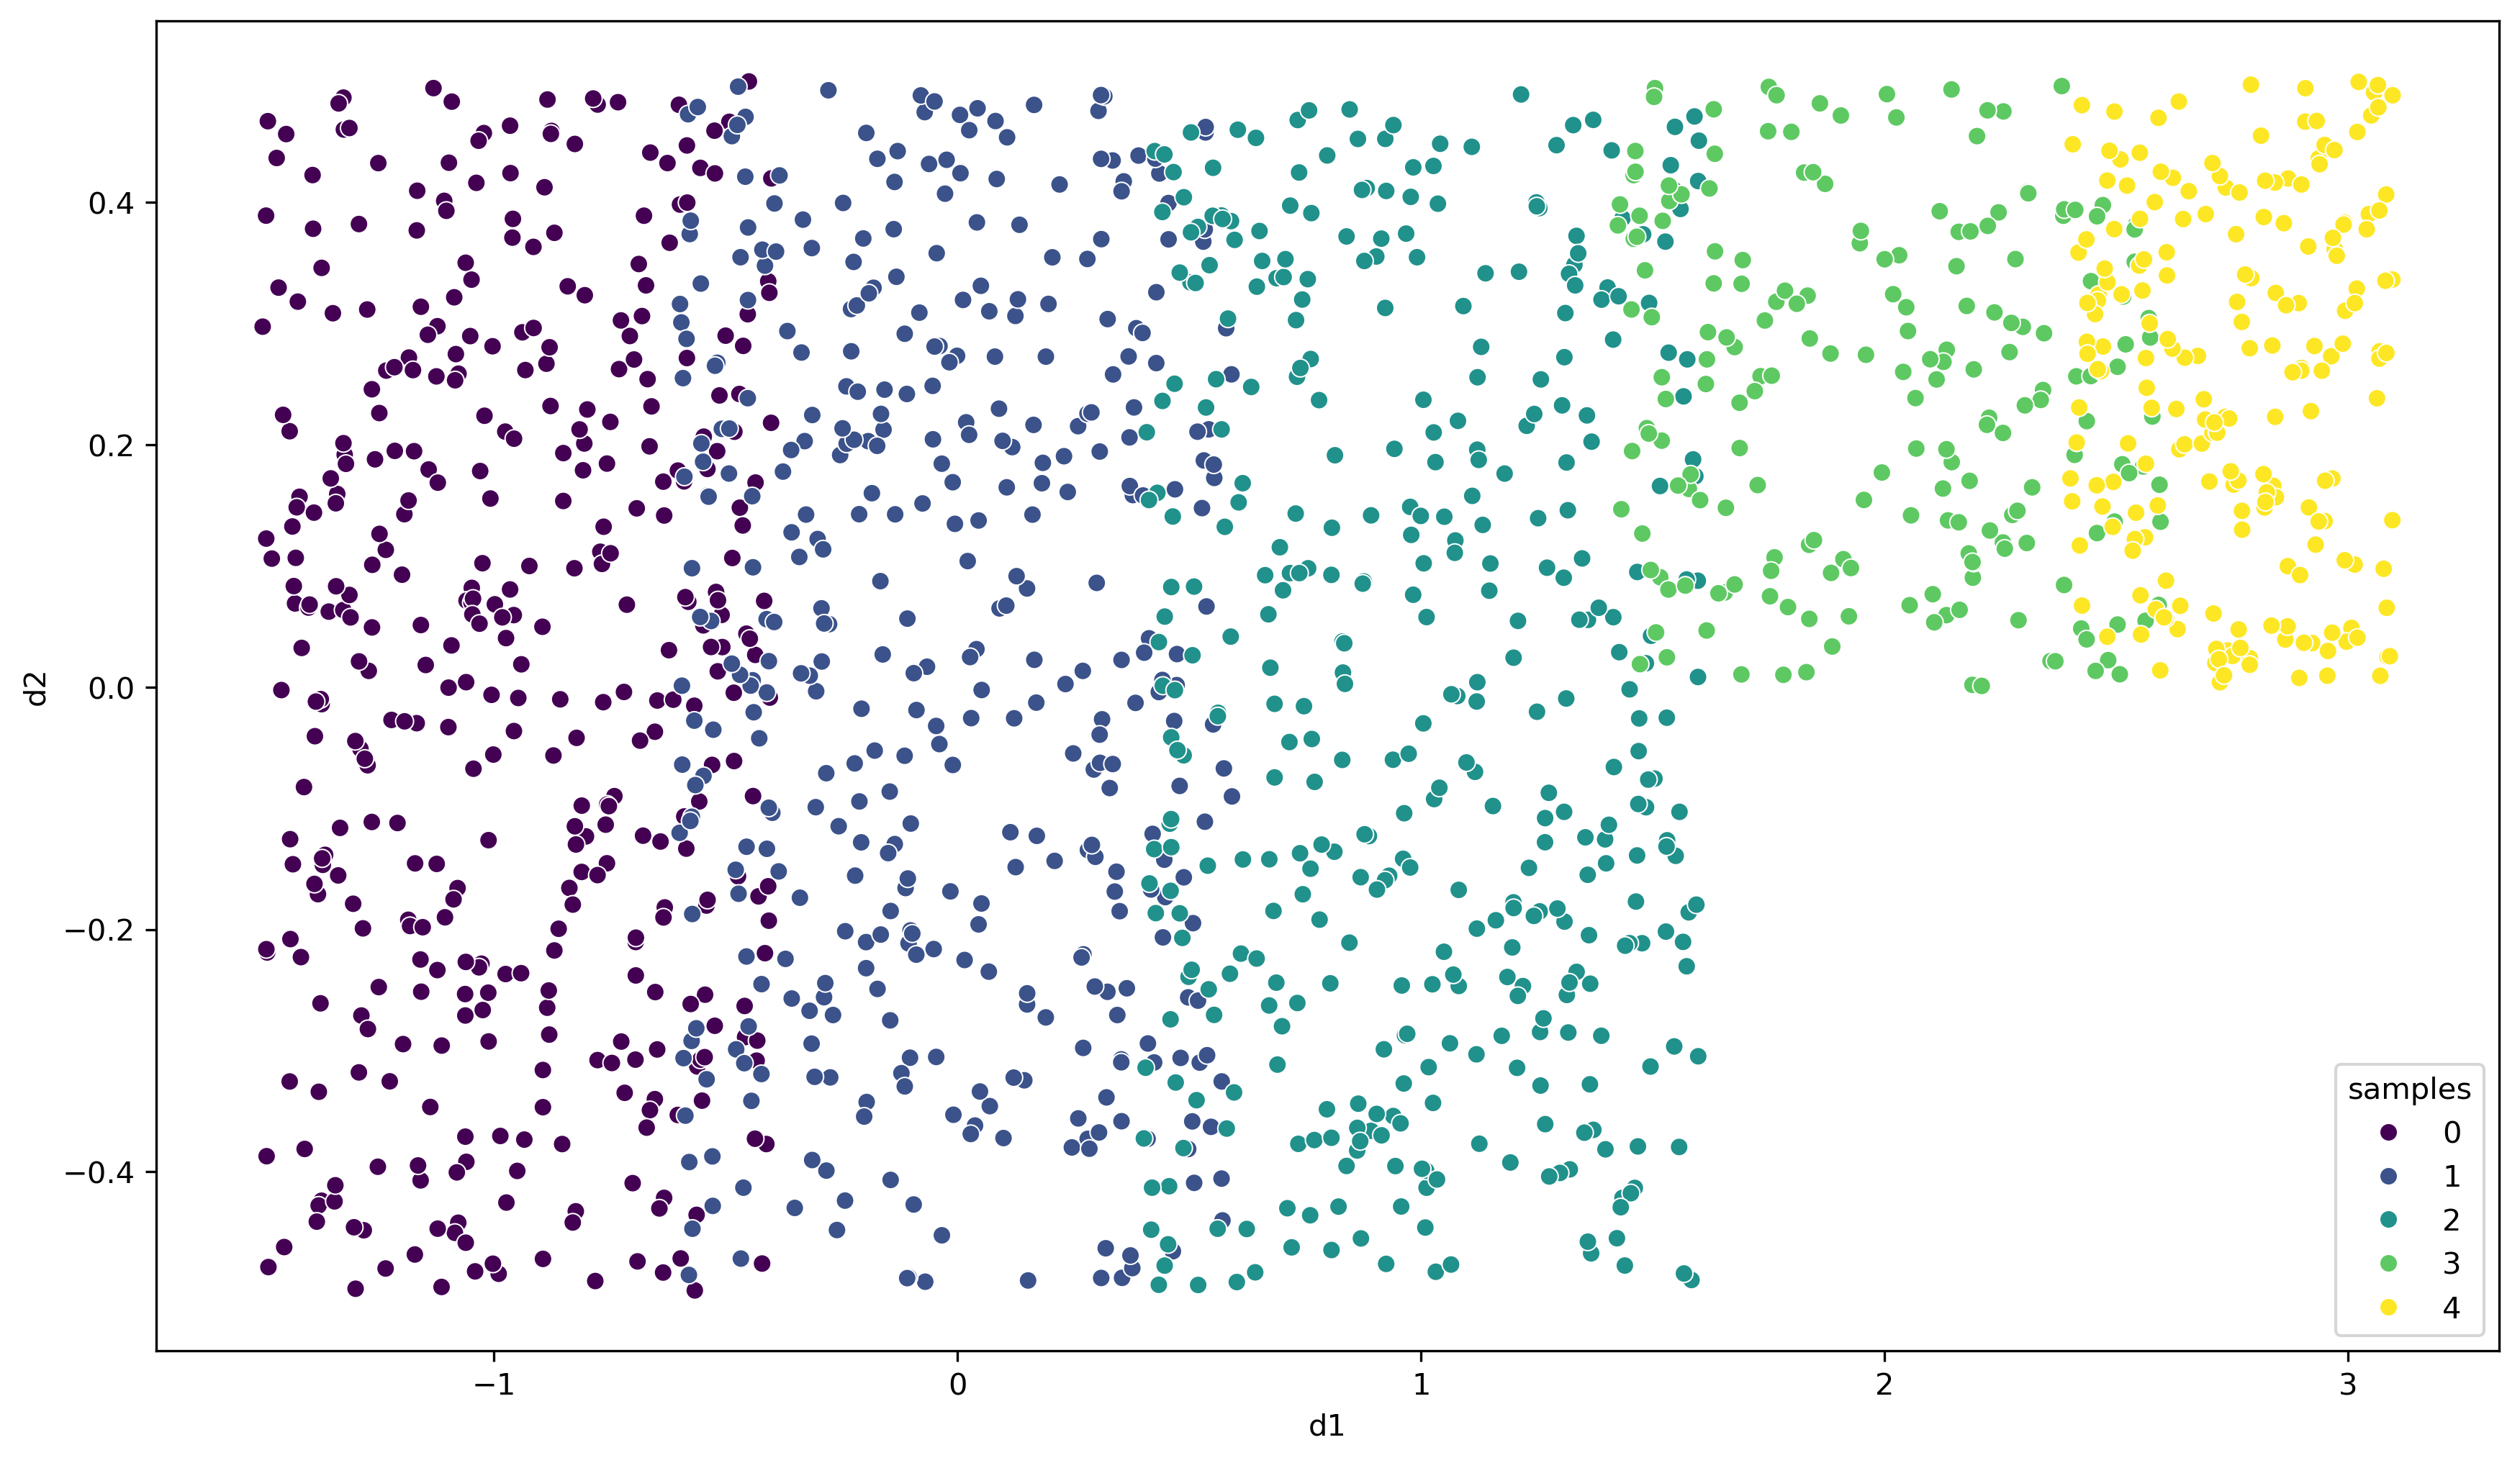

In [7]:
fig = plt.figure(figsize=(14, 8), dpi=300)
sns.scatterplot(data=df, x='d1', y='d2', hue='samples', palette='viridis');

In [8]:
df_copy = df.copy()
means = df[['d1', 'd2']].mean(axis=0)
stds = df[['d1', 'd2']].std(axis=0)
df[['d1', 'd2']] = (df[['d1', 'd2']] - means) / stds

In [9]:
df['samples'].value_counts()

samples
0    400
1    400
2    400
3    200
4    200
Name: count, dtype: int64

In [10]:
import ot

In [11]:
reg_m = [1_000, 100_000.0]
samples = sorted(df['samples'].unique())
growth_rates = []

df['growth_rate'] = np.nan
for i in range(len(samples)-1):
    x0 = df.loc[df['samples'] == samples[i], ['d1', 'd2']].values
    x1 = df.loc[df['samples'] == samples[i+1], ['d1', 'd2']].values
    m, n = ot.unif(len(x0)), ot.unif(len(x1))
    M = ot.dist(x0, x1)
    plan = ot.unbalanced.mm_unbalanced(m, n, M, reg_m, div='l2')
    gr = plan.sum(axis=1) * plan.shape[0]
    growth_rates.append(gr)
    df.loc[df['samples'] == samples[i], 'growth_rate'] = gr


In [12]:
gr

array([0.88956934, 0.93296425, 0.89935375, 0.96954423, 0.98867004,
       0.93217722, 0.91733846, 0.89575652, 1.05021837, 0.90329629,
       1.07902764, 0.94468729, 1.06084443, 1.01889844, 0.92665043,
       1.05526705, 1.07301382, 1.05190158, 1.01179935, 1.06809035,
       1.07861226, 0.9847646 , 1.045469  , 0.96018792, 0.88562701,
       1.07710006, 0.97919319, 1.03040221, 1.03586864, 0.89073481,
       1.04921464, 1.06900236, 1.03754245, 0.96398029, 0.98168688,
       1.07205605, 1.04552441, 1.01644368, 1.02863654, 0.91959681,
       0.94130392, 0.9005683 , 1.06489275, 1.02878222, 0.93773134,
       1.02446642, 0.89584647, 0.90114645, 1.0759542 , 0.92903763,
       1.03762084, 0.92438716, 1.08934848, 1.06861605, 0.91678532,
       1.07012253, 1.08888508, 0.91360932, 0.93185158, 1.07964452,
       1.02643674, 1.05639625, 1.07323664, 0.99130558, 0.89395642,
       1.09350296, 0.98168772, 0.89471049, 1.06377778, 0.96747924,
       0.95541778, 1.04398584, 0.89035285, 1.03336334, 0.99004

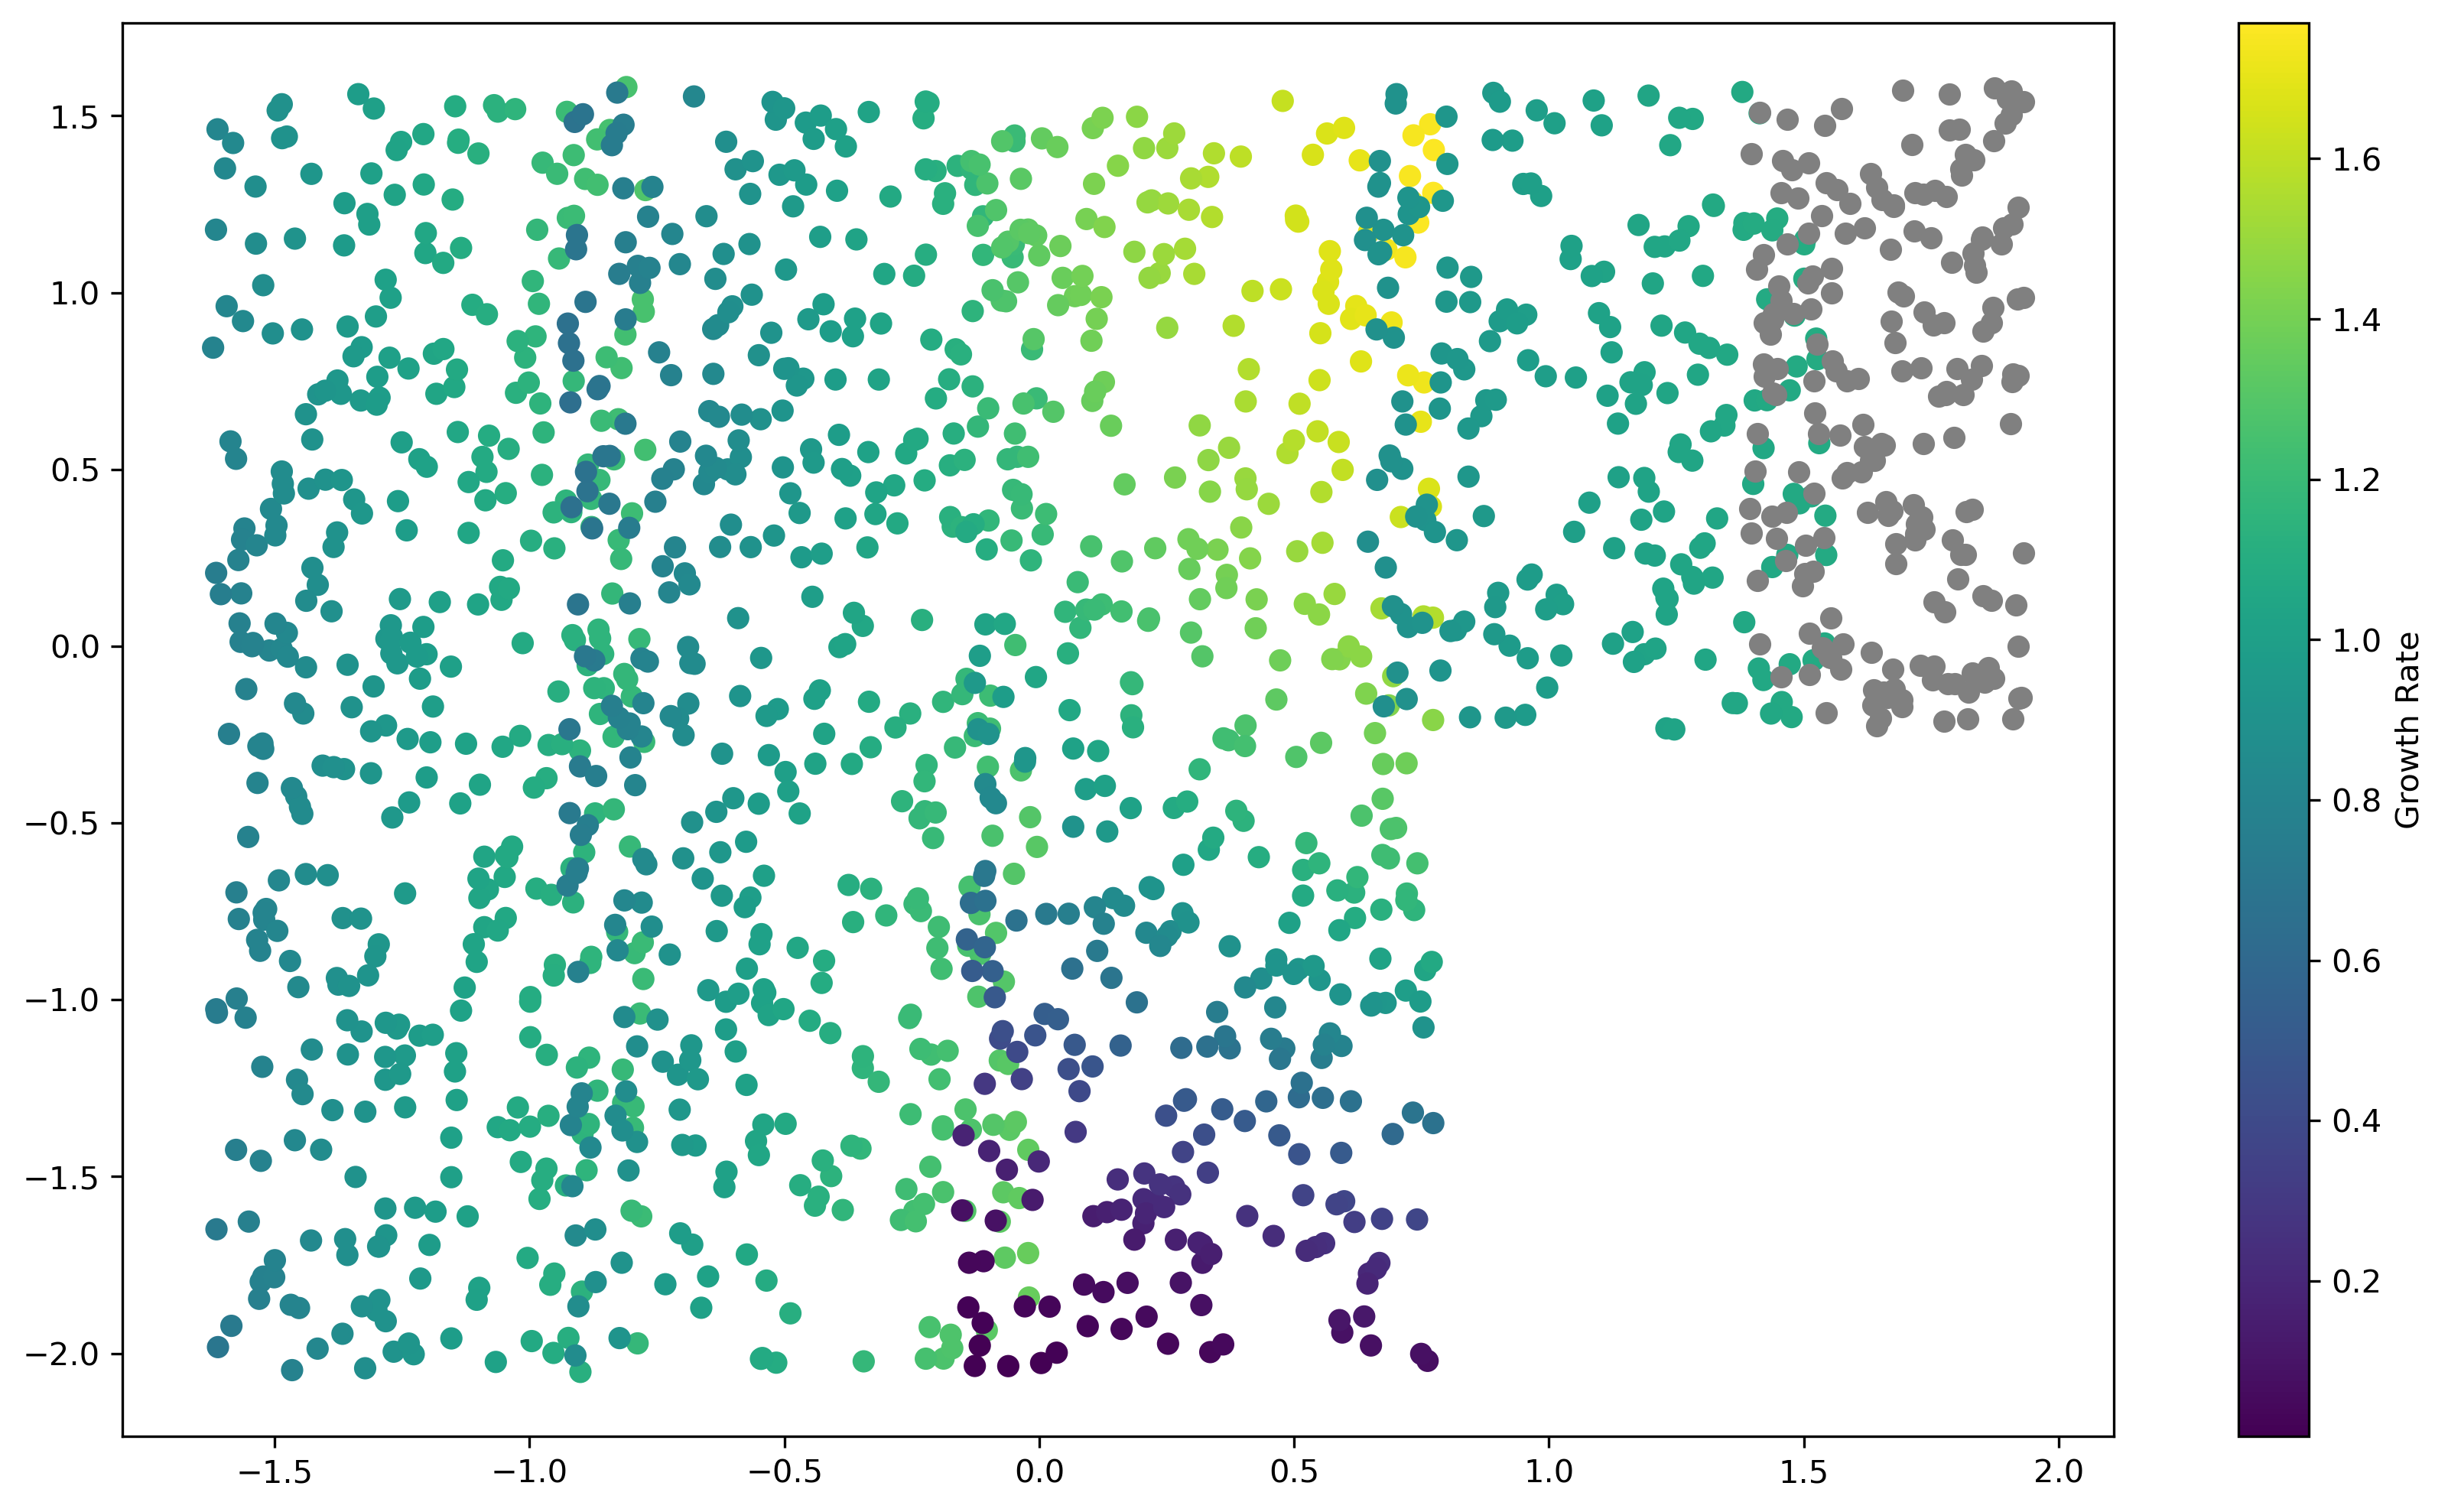

In [13]:
fig = plt.figure(figsize=(14, 8), dpi=300)
mask = df['growth_rate'].isna()
# Plot non-NaN values with viridis colormap
scatter = plt.scatter(df.loc[~mask, 'd1'], df.loc[~mask, 'd2'], 
                     c=df.loc[~mask, 'growth_rate'], cmap='viridis')
# Plot NaN values in gray
plt.scatter(df.loc[mask, 'd1'], df.loc[mask, 'd2'], c='gray')
plt.colorbar(scatter, label='Growth Rate');